(pd)=

# Pandas

In addition to what's in Anaconda, this lecture will need the following
libraries:

In [1]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 107 kB 24.2 MB/s 


     |████████                        | 1.4 MB 30.7 MB/s eta 0:00:01

     |████████████████████████████████| 5.5 MB 30.7 MB/s eta 0:00:01

     |████████████████████████████████| 5.5 MB 30.7 MB/s 


## Overview

[Pandas](http://pandas.pydata.org/) is a package of fast, efficient data
analysis tools for Python.

Its popularity has surged in recent years, coincident with the rise of
fields such as data science and machine learning.

Here\'s a popularity comparison over time against STATA, SAS, and
[dplyr](https://dplyr.tidyverse.org/) courtesy of Stack Overflow Trends

```{figure} /_static/lecture_specific/pandas/pandas_vs_rest.png
:scale: 23%
```

Just as [NumPy](http://www.numpy.org/) provides the basic array data
type plus core array operations, pandas

1.  defines fundamental structures for working with data and
2.  endows them with methods that facilitate operations such as
  -   reading in data
  -   adjusting indices
  -   working with dates and time series
  -   sorting, grouping, re-ordering and general data munging[^1]
  -   dealing with missing values, etc., etc.

More sophisticated statistical functionality is left to other packages,
such as [statsmodels](http://www.statsmodels.org/) and
[scikit-learn](http://scikit-learn.org/), which are built on top of
pandas.

This lecture will provide a basic introduction to pandas.

Throughout the lecture, we will assume that the following imports have
taken place

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

## Series

Two important data types defined by pandas are `Series` and `DataFrame`.

You can think of a `Series` as a \"column\" of data, such as a
collection of observations on a single variable.

A `DataFrame` is an object for storing related columns of data.

Let\'s start with `Series`

In [3]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    1.305645
1   -0.895247
2    0.729202
3   -0.679537
Name: daily returns, dtype: float64

Here you can imagine the indices `0, 1, 2, 3` as indexing four listed
companies, and the values being daily returns on their shares.

Pandas `Series` are built on top of NumPy arrays and support many
similar operations

In [4]:
s * 100

0    130.564487
1    -89.524684
2     72.920204
3    -67.953706
Name: daily returns, dtype: float64

In [5]:
np.abs(s)

0    1.305645
1    0.895247
2    0.729202
3    0.679537
Name: daily returns, dtype: float64

But `Series` provide more than NumPy arrays.

Not only do they have some additional (statistically oriented) methods

In [6]:
s.describe()

count    4.000000
mean     0.115016
std      1.071878
min     -0.895247
25%     -0.733465
50%      0.024832
75%      0.873313
max      1.305645
Name: daily returns, dtype: float64

But their indices are more flexible

In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    1.305645
AAPL   -0.895247
MSFT    0.729202
GOOG   -0.679537
Name: daily returns, dtype: float64

Viewed in this way, `Series` are like fast, efficient Python
dictionaries (with the restriction that the items in the dictionary all
have the same type---in this case, floats).

In fact, you can use much of the same syntax as Python dictionaries

In [8]:
s['AMZN']

1.3056448707478496

In [9]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.895247
MSFT    0.729202
GOOG   -0.679537
Name: daily returns, dtype: float64

In [10]:
'AAPL' in s

True

## DataFrames

While a `Series` is a single column of data, a `DataFrame` is several
columns, one for each variable.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized)
Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are
naturally organized into rows and columns, often with descriptive
indexes for individual rows and individual columns.

```{only} html
Let\'s look at an example that reads data from the CSV file
`pandas/data/test_pwt.csv` that can be downloaded
[here](https://lectures.quantecon.org/_downloads/pandas/data/test_pwt.csv).
```

```{only} latex
Let\'s look at an example that reads data from the CSV file
`pandas/data/test_pwt.csv` and can be downloaded
[here](https://lectures.quantecon.org/_downloads/pandas/data/test_pwt.csv).
```

Here\'s the content of `test_pwt.csv`

```{code-block} none
"country","country isocode","year","POP","XRAT","tcgdp","cc","cg"
"Argentina","ARG","2000","37335.653","0.9995","295072.21869","75.716805379","5.5788042896"
"Australia","AUS","2000","19053.186","1.72483","541804.6521","67.759025993","6.7200975332"
"India","IND","2000","1006300.297","44.9416","1728144.3748","64.575551328","14.072205773"
"Israel","ISR","2000","6114.57","4.07733","129253.89423","64.436450847","10.266688415"
"Malawi","MWI","2000","11801.505","59.543808333","5026.2217836","74.707624181","11.658954494"
"South Africa","ZAF","2000","45064.098","6.93983","227242.36949","72.718710427","5.7265463933"
"United States","USA","2000","282171.957","1","9898700","72.347054303","6.0324539789"
"Uruguay","URY","2000","3219.793","12.099591667","25255.961693","78.978740282","5.108067988"
```

Supposing you have this data saved as `test_pwt.csv` in the present
working directory (type `%pwd` in Jupyter to see what this is), it can
be read in as follows:

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [12]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


We can select particular rows using standard Python array slicing
notation

In [13]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the
desired columns represented as strings

In [14]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the `iloc` attribute
should be used with the format `.iloc[rows, columns]`

In [15]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using a mixture of integers and labels, the
`loc` attribute can be used in a similar way

In [16]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


Let\'s imagine that we\'re only interested in population (`POP`) and
total GDP (`tcgdp`).

One way to strip the data frame `df` down to only these variables is to
overwrite the dataframe using the selection method described above

In [17]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


Here the index `0, 1,..., 7` is redundant because we can use the country
names as an index.

To do this, we set the index to be the `country` variable in the
dataframe

In [18]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Let\'s give the columns slightly better names

In [19]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Population is in thousands, let\'s revert to single units

In [20]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


Next, we\'re going to add a column showing real GDP per capita,
multiplying by 1,000,000 as we go because total GDP is in millions

In [21]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


One of the nice things about pandas `DataFrame` and `Series` objects is
that they have methods for plotting and visualization that work through
Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

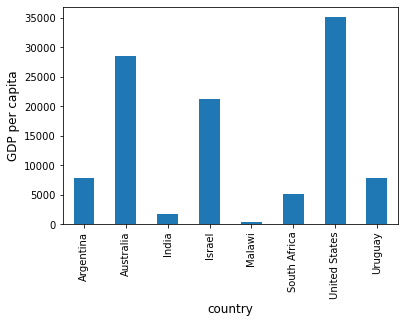

In [22]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

At the moment the data frame is ordered alphabetically on the
countries---let\'s change it to GDP per capita

In [23]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


Plotting as before now yields

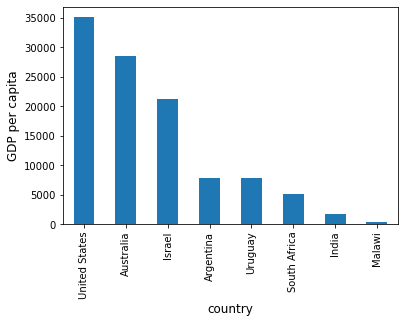

In [24]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

## On-Line Data Sources

Python makes it straightforward to query online databases
programmatically.

An important database for economists is
[FRED](https://research.stlouisfed.org/fred2/) --- a vast collection
of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the [unemployment
rate](https://research.stlouisfed.org/fred2/series/UNRATE).

Via FRED, the entire series for the US civilian unemployment rate can be
downloaded directly by entering this URL into your browser (note that
this requires an internet connection)

```{code-block} none
https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv
```

(Equivalently, click here:
https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv)

This request returns a CSV file, which will be handled by your default
application for this class of files.

Alternatively, we can access the CSV file from within a Python program.

This can be done with a variety of methods.

We start with a relatively low-level method and then return to pandas.

### Accessing Data with requests

One option is to use
[requests](https://requests.readthedocs.io/en/master/), a standard
Python library for requesting data over the Internet.

To begin, try the following code on your computer

In [25]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

If there\'s no error message, then the call has succeeded.

If you do get an error, then there are two likely causes

1.  You are not connected to the Internet --- hopefully, this isn\'t
    the case.
2.  Your machine is accessing the Internet through a proxy server, and
    Python isn\'t aware of this.

In the second case, you can either

-   switch to another machine
-   solve your proxy problem by reading [the
    documentation](https://requests.readthedocs.io/en/master/)

Assuming that all is working, you can now proceed to use the `source`
object returned by the call
`requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')`

In [26]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [27]:
source[1]

'1948-01-01,3.4\r'

In [28]:
source[2]

'1948-02-01,3.8\r'

We could now write some additional code to parse this text and store it
as an array.

But this is unnecessary --- pandas\' `read_csv` function can handle
the task for us.

We use `parse_dates=True` so that pandas recognizes our dates column,
allowing for simple date filtering

In [29]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

The data has been read into a pandas DataFrame called `data` that we can
now manipulate in the usual way

In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [32]:
pd.set_option('precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,872.0
mean,5.8
std,1.7
min,2.5
25%,4.5
50%,5.6
75%,6.8
max,14.7


We can also plot the unemployment rate from 2006 to 2012 as follows

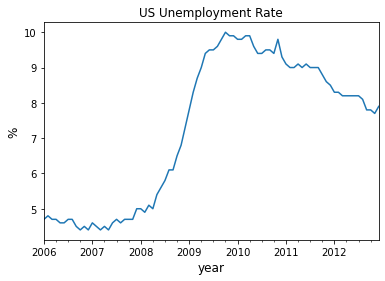

In [33]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

Note that pandas offers many other file type alternatives.

Pandas has [a wide
variety](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)
of top-level methods that we can use to read, excel, json, parquet or
plug straight into a database server.

### Using pandas_datareader to Access Data

The maker of pandas has also authored a library called
`pandas_datareader` that gives programmatic access to many
data sources straight from the Jupyter notebook.

While some sources require an access key, many of the most important
(e.g., FRED, [OECD](https://data.oecd.org/),
[EUROSTAT](https://ec.europa.eu/eurostat/data/database) and the World
Bank) are free to use.

For now let\'s work through one example of downloading and plotting data
--- this time from the World Bank.

The World Bank [collects and organizes
data](http://data.worldbank.org/indicator) on a huge range of
indicators.

For example,
[here\'s](http://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS/countries)
some data on government debt as a ratio to GDP.

The next code example fetches the data for you and plots time series for
the US and Australia

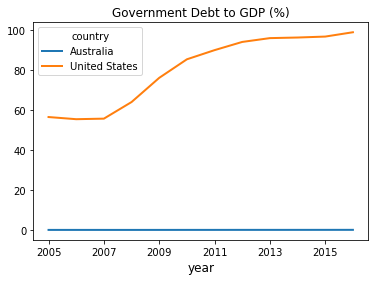

In [34]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

The
[documentation](https://pandas-datareader.readthedocs.io/en/latest/index.html)
provides more details on how to access various data sources.

## Exercises

(pd_ex1)=

### Exercise 1

With these imports:

In [35]:
import datetime as dt 
from pandas_datareader import data

Write a program to calculate the percentage price change over 2019 for
the following shares:

In [36]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

Here\'s the first part of the program

In [37]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)): 
    """
    This function reads in closing price data from Yahoo 
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

Complete the program to plot the result as a bar graph like this one:

```{glue:} pandas_share_prices
```

(pd_ex2)=

### Exercise 2

Using the method `read_data` introduced in
{ref}`Exercise 1 <pd_ex1>`, write a program to
obtain year-on-year percentage change for the following indices:

In [38]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

Complete the program to show summary statistics and plot the result as a
time series graph like this one:

```{glue:} pandas_indices_pctchange
```

## Solutions

### Exercise 1

There are a few ways to approach this problem using Pandas to calculate
the percentage change.

First, you can extract the data and perform the calculation such as:

In [39]:
p1 = ticker.iloc[0]    #Get the first set of prices as a Series
p2 = ticker.iloc[-1]   #Get the last set of prices as a Series
price_change = (p2 - p1) / p1 * 100
price_change

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
AAPL    85.9
AMZN    20.1
BA       0.6
QCOM    53.7
KO      17.9
GOOG    27.8
SNE     39.6
PTR    -17.4
dtype: float64

Alternatively you can use an inbuilt method `pct_change` and configure
it to perform the correct calculation using `periods` argument.

In [40]:
change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = change.iloc[-1]
price_change

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
AAPL    85.9
AMZN    20.1
BA       0.6
QCOM    53.7
KO      17.9
GOOG    27.8
SNE     39.6
PTR    -17.4
Name: 2019-12-31 00:00:00, dtype: float64

Then to plot the chart

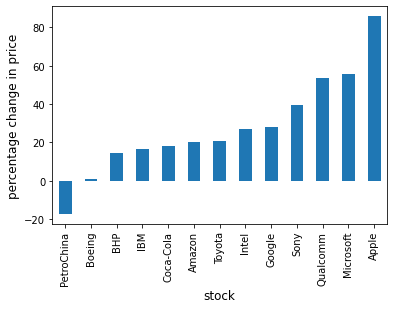

In [41]:
price_change.sort_values(inplace=True)
price_change = price_change.rename(index=ticker_list)
fig, ax = plt.subplots()
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()

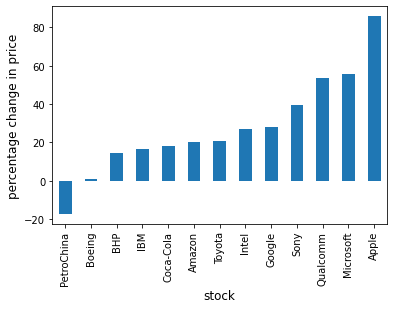

In [42]:
from myst_nb import glue
glue("pandas_share_prices", fig, display=False)

### Exercise 2

Following the work you did in {ref}`Exercise 1 <pd_ex1>`, you can query the data using `read_data` by updating the
start and end dates accordingly.

In [43]:
indices_data = read_data(
        indices_list,
        start=dt.datetime(1928, 1, 2),
        end=dt.datetime(2020, 12, 31)
)

Then, extract the first and last set of prices per year as DataFrames
and calculate the yearly returns such as:

In [44]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first()  # Get the first set of returns as a DataFrame
    p2 = indices_data.groupby(indices_data.index.year)[index].last()   # Get the last set of returns as a DataFrame
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns

yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
1928,3.7e-01,NaN,NaN,NaN
1929,-1.4e-01,NaN,NaN,NaN
1930,-2.8e-01,NaN,NaN,NaN
1931,-4.9e-01,NaN,NaN,NaN
1932,-8.5e-02,NaN,NaN,NaN
...,...,...,...,...
2016,1.1e-01,9.8e-02,1.5e-01,3.6e-02
2017,1.8e-01,2.7e-01,2.4e-01,1.6e-01
2018,-7.0e-02,-5.3e-02,-6.0e-02,-1.5e-01
2019,2.9e-01,3.5e-01,2.2e-01,2.1e-01


Next, you can obtain summary statistics by using the method `describe`.

In [45]:
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,9.3e+01,5.0e+01,3.6e+01,5.6e+01
mean,7.5e-02,1.2e-01,9.4e-02,7.7e-02
std,1.9e-01,2.4e-01,1.4e-01,2.4e-01
min,-4.9e-01,-4.0e-01,-3.3e-01,-4.0e-01
25%,-6.0e-02,-1.2e-02,4.2e-03,-8.1e-02
50%,9.9e-02,1.4e-01,8.9e-02,7.5e-02
75%,2.0e-01,2.7e-01,2.2e-01,2.1e-01
max,4.6e-01,8.4e-01,3.3e-01,9.2e-01


Then, to plot the chart

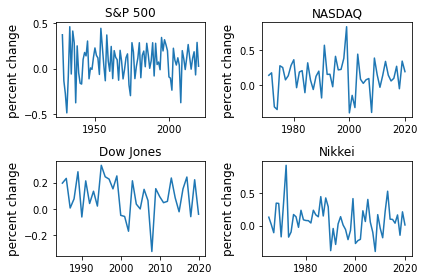

In [46]:
fig, axes = plt.subplots(2, 2)

for iter_, ax in enumerate(axes.flatten()):            # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iter_]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout() 

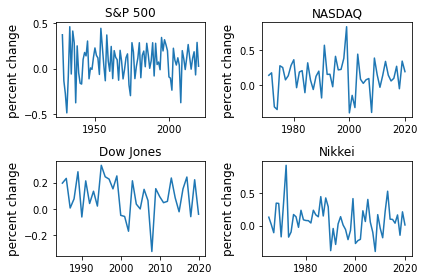

In [47]:
from myst_nb import glue
glue("pandas_indices_pctchange", fig, display=False)

**Footnotes**

[^1]: Wikipedia defines munging as cleaning data from one raw form into a structured, purged one.